# Conforming to Statistical Assumptions
>  In this chapter, you will focus on analyzing the underlying distribution of your data and whether it will impact your machine learning pipeline. You will learn how to deal with skewed data and situations where outliers may be negatively impacting your analysis.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Python, Datacamp, Machine Learning]
- image: images/datacamp/1_supervised_learning_with_scikit_learn/2_regression.png

> Note: This is a summary of the course's chapter 3 exercises "Feature Engineering for Machine Learning in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Data distributions

### What does your data look like? (I)

<p>Up until now you have focused on creating new features and dealing with issues in your data. Feature engineering can also be used to make the most out of the data that you already have and use it more effectively when creating machine learning models.<br>
Many algorithms may assume that your data is normally distributed, or at least that all your columns are on the same scale. This will often not be the case, e.g. one feature may be measured in thousands of dollars while another would be number of years. In this exercise, you will create plots to examine the distributions of some numeric columns in the <code>so_survey_df</code> DataFrame, stored in <code>so_numeric_df</code>.</p>

In [39]:
so_survey_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/10-feature-engineering-for-machine-learning-in-python/datasets/so_survey_df.csv')

Instructions 1/3
<p>Generate a histogram of all columns in the <code>so_numeric_df</code> DataFrame.</p>

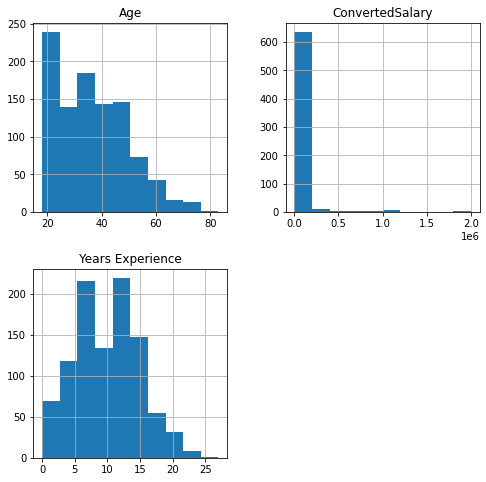

In [40]:
# Create a histogram
so_numeric_df.hist()
plt.show()

Instructions 2/3
<p>Generate box plots of the <code>Age</code> and <code>Years Experience</code> columns in the <code>so_numeric_df</code> DataFrame.</p>

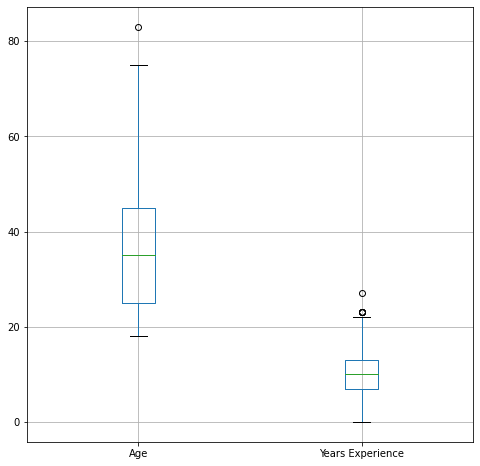

In [41]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

Instructions 3/3
<p>Generate a box plot of the <code>ConvertedSalary</code> column in the <code>so_numeric_df</code> DataFrame.</p>

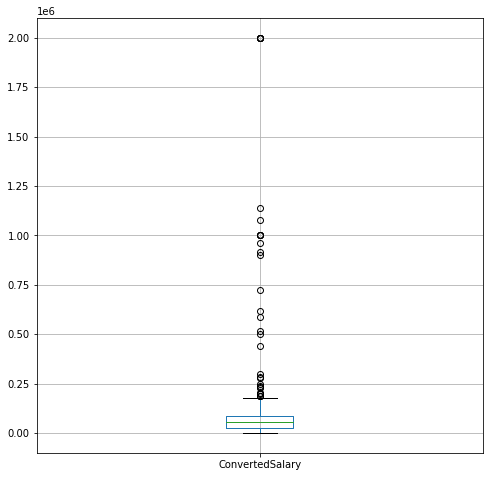

In [42]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

**as you can see the distrbutions of columns in a dataset can vary quite a bit.**

### What does your data look like? (II)

<p>In the previous exercise you looked at the distribution of individual columns. While this is a good start, a more detailed view of how different features interact with each other may be useful as this can impact your decision on what to transform and how.</p>

In [46]:
so_survey_df['ConvertedSalary'].fillna(0, inplace=True)
so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]

Instructions 1/2
<ul>
<li>Import <code>matplotlib</code>'s <code>pyplot</code> module as <code>plt</code>. </li>
<li>Import seaborn as <code>sns</code>. </li>
<li>Plot pairwise relationships in the <code>so_numeric_df</code> dataset. </li>
<li>Show the plot.</li>
</ul>

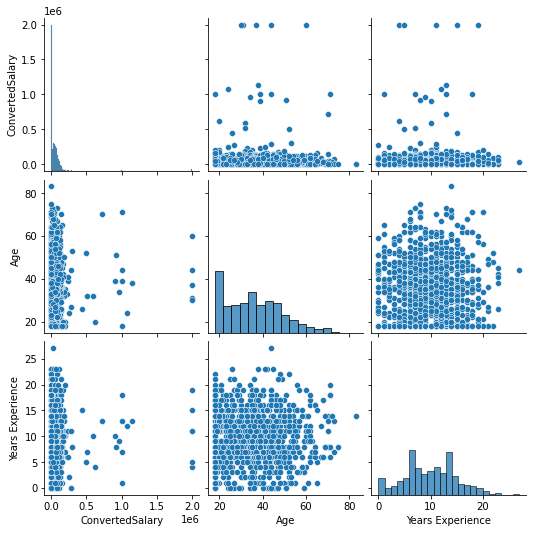

In [47]:
# Plot pairwise relationships
sns.pairplot(so_numeric_df)
# Show plot
plt.show()

Instructions 2/2
<p>Print the summary statistics of the <code>so_numeric_df</code> DataFrame.</p>

In [26]:
# Print summary statistics
print(so_numeric_df.describe())

       ConvertedSalary         Age  Years Experience
count     9.990000e+02  999.000000        999.000000
mean      6.161746e+04   36.003003          9.961962
std       1.760924e+05   13.255127          4.878129
min       0.000000e+00   18.000000          0.000000
25%       0.000000e+00   25.000000          7.000000
50%       2.712000e+04   35.000000         10.000000
75%       7.000000e+04   45.000000         13.000000
max       2.000000e+06   83.000000         27.000000


**understanding these summary statistics of a column can be very valuable when deciding what transformations are necessary.**

### When don't you have to transform your data?

<p>While making sure that all of your data is on the same scale is advisable for most analyses, for which of the following machine learning models is normalizing data not always necessary?</p>

<pre>
Possible Answers

K-Means

<b>Decision Trees</b>

Linear Regression

K-nearest neighbors

</pre>

**As decision trees split along a singular point, they do not require all the columns to be on the same scale.**

## Scaling and transformations

### Normalization

<p>As discussed in the video, in normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.<br>
When using scikit-learn (the most commonly used machine learning library in Python) you can use a <code>MinMaxScaler</code> to apply normalization. 
<em>(It is called this as it scales your values between a minimum and maximum value.)</em></p>

In [50]:
so_survey_df = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/10-feature-engineering-for-machine-learning-in-python/datasets/so_survey_df.csv')
so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]

Instructions
<ul>
<li>Import <code>MinMaxScaler</code> from <code>sklearn</code>'s <code>preprocessing</code> module. </li>
<li>Instantiate the <code>MinMaxScaler()</code> as <code>MM_scaler</code>.</li>
<li>Fit the <code>MinMaxScaler</code> on the <code>Age</code> column of <code>so_numeric_df</code>.</li>
<li>Transform the same column with the scaler you just fit.</li>
</ul>

In [51]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the original and transformed column
so_numeric_df[['Age_MM', 'Age']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Age_MM,Age
0,0.046154,21
1,0.307692,38
2,0.415385,45
3,0.430769,46
4,0.323077,39


**Did you notice that all values have been scaled between 0 and 1?**

### Standardization

<p>While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers. One commonly used solution to this is called standardization, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.</p>

Instructions
<ul>
<li>Import <code>StandardScaler</code> from <code>sklearn</code>'s <code>preprocessing</code> module. </li>
<li>Instantiate the <code>StandardScaler()</code> as <code>SS_scaler</code>.</li>
<li>Fit the <code>StandardScaler</code> on the <code>Age</code> column of <code>so_numeric_df</code>.</li>
<li>Transform the same column with the scaler you just fit.</li>
</ul>

In [52]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the original and transformed column
so_numeric_df[['Age_SS', 'Age']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Age_SS,Age
0,-1.132431,21
1,0.150734,38
2,0.679096,45
3,0.754576,46
4,0.226214,39


**you can see that the values have been scaled linearly, but not between set values.**

### Log transformation

<p>In the previous exercises you scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population. In this exercise you will use a log transform on the <code>ConvertedSalary</code> column in the <code>so_numeric_df</code> DataFrame as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.</p>

Instructions
<ul>
<li>Import <code>PowerTransformer</code> from <code>sklearn</code>'s <code>preprocessing</code> module. </li>
<li>Instantiate the <code>PowerTransformer()</code> as <code>pow_trans</code>.</li>
<li>Fit the <code>PowerTransformer</code> on the <code>ConvertedSalary</code> column of <code>so_numeric_df</code>.</li>
<li>Transform the same column with the scaler you just fit.</li>
</ul>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


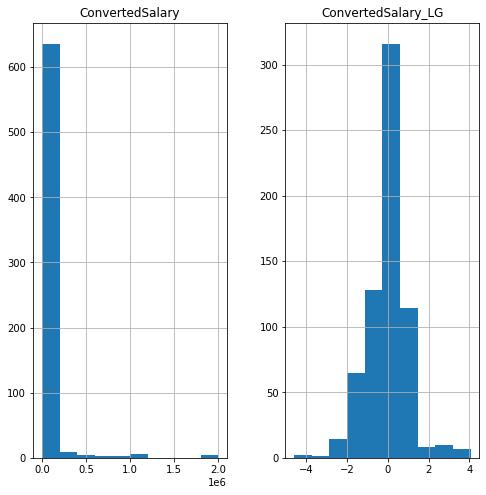

In [53]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist();
plt.show()

**Did you notice the change in the shape of the distribution? ConvertedSalary_LG column looks much more normal than the original ConvertedSalary column.**

### When can you use normalization?

<p>When could you use normalization (<code>MinMaxScaler</code>) when working with a dataset?</p>

<pre>
Possible Answers

<b>When you know that your data may have outliers.</b>

When you know the the data has a strict upper and lower bound.

When you know that your test data may contain smaller values than your training data.

When you know that your test data may contain larger values than your training data.

</pre>

**Normalization scales all points linearly between the upper and lower bound.**

## Removing outliers

### Percentage based outlier removal

<p>One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.</p>

Instructions
<ul>
<li>Find the 95th quantile of the <code>ConvertedSalary</code> column. </li>
<li>Trim the <code>so_numeric_df</code> DataFrame to retain all rows where <code>ConvertedSalary</code> is less than it's 95th quantile. </li>
<li>Plot the histogram of <code>so_numeric_df[['ConvertedSalary']]</code>. </li>
<li>Plot the histogram of <code>trimmed_df[['ConvertedSalary']]</code>.</li>
</ul>

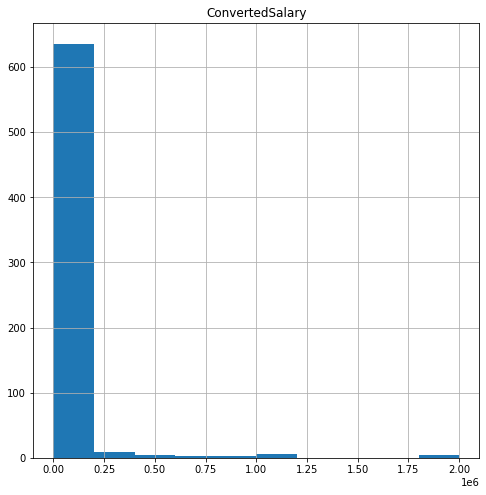

<Figure size 576x576 with 0 Axes>

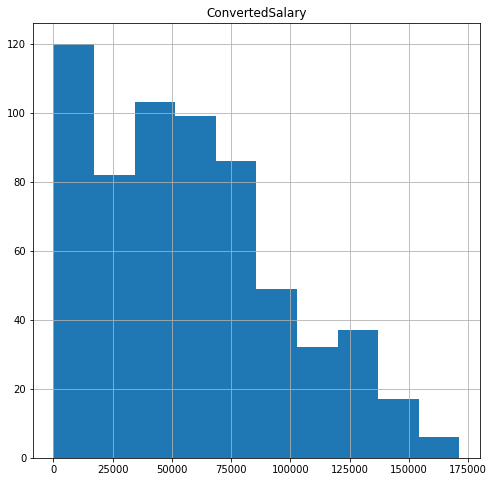

In [55]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

**In the next exercise, you will work with a more statistically sound approach in removing outliers.**

### Statistical outlier removal

<p>While removing the top N% of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.</p>

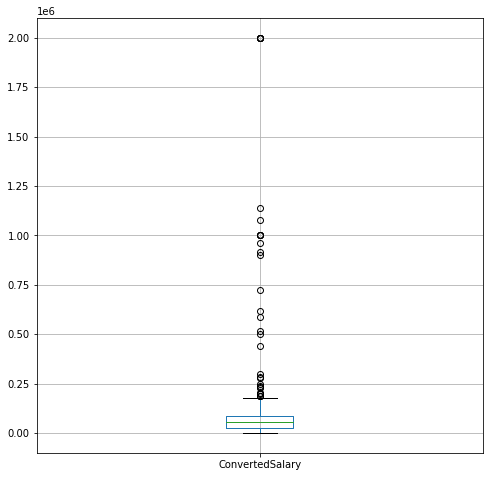

In [56]:
#@title ⠀ { display-mode: "form" }
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

Instructions
<ul>
<li>Calculate the standard deviation and mean of the <code>ConvertedSalary</code> column of <code>so_numeric_df</code>.  </li>
<li>Calculate the upper and lower bounds as three standard deviations away from the mean in both the directions. </li>
<li>Trim the <code>so_numeric_df</code> DataFrame to retain all rows where <code>ConvertedSalary</code> is within the <code>lower</code> and <code>upper</code> bounds.</li>
</ul>

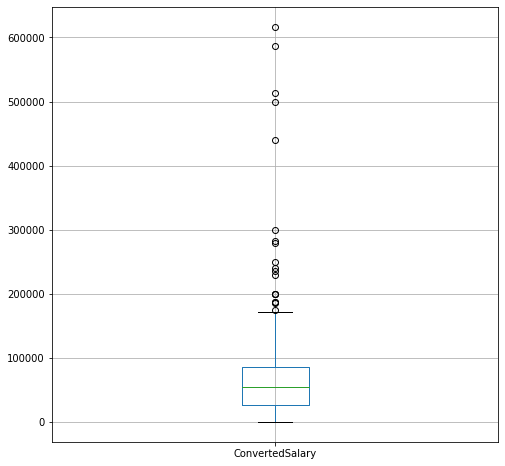

In [57]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

**Did you notice the scale change on the y-axis?**

## Scaling and transforming new data

### Train and testing transformations (I)

<div class=""><p>So far you have created scalers based on a column, and then applied the scaler to the same data that it was trained on. When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.<br>
<em>To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. You should never retrain a scaler on the test set.</em></p>
<p>For this exercise and the next, we split the <code>so_numeric_df</code> DataFrame into train (<code>so_train_numeric</code>) and test (<code>so_test_numeric</code>) sets.</p></div>

In [80]:
from sklearn.model_selection import train_test_split
so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]
so_train_numeric, so_test_numeric = train_test_split(so_numeric_df, test_size=0.3)

Instructions
<ul>
<li>Instantiate the <code>StandardScaler()</code> as <code>SS_scaler</code>.</li>
<li>Fit the <code>StandardScaler</code> on the <code>Age</code> column.</li>
<li>Transform the <code>Age</code> column in the test set (<code>so_test_numeric</code>).</li>
</ul>

In [82]:
# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
so_test_numeric[['Age', 'Age_ss']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,Age_ss
981,25,-0.876183
72,44,0.594197
7,24,-0.953572
123,58,1.677635
752,71,2.683685


**Data leakage is one of the most common mistakes data scientists tend to make, and I hope that you won't!**

### Train and testing transformations (II)

<div class=""><p>Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the <em>thresholds calculated only from the train set</em> to remove outliers from the test set. </p>
<p>Similar to the last exercise, we split the <code>so_numeric_df</code> DataFrame into train (<code>so_train_numeric</code>) and test (<code>so_test_numeric</code>) sets.</p></div>

Instructions
<ul>
<li>Calculate the standard deviation and mean of the <code>ConvertedSalary</code> column.  </li>
<li>Calculate the upper and lower bounds as three standard deviations away from the mean in both the directions. </li>
<li>Trim the <code>so_test_numeric</code> DataFrame to retain all rows where <code>ConvertedSalary</code> is within the lower and upper bounds.</li>
</ul>

In [83]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

**In the next chapter, you will deal with unstructured (text) data.**